In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.activations import relu, linear
from keras.losses import mean_absolute_error as mae
from keras.callbacks import EarlyStopping, History

In [47]:
dataset = pd.read_csv('input/House_Price/train.csv')
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [48]:
test_dataset = dataset[['OverallQual', 'OverallCond',
                        'YearBuilt', 'YearRemodAdd',
                        'MasVnrArea', 'TotalBsmtSF',
                        '1stFlrSF', '2ndFlrSF',
                        'FullBath', 'HalfBath',
                        'GarageCars', 'GarageArea',
                        'GrLivArea', 'TotRmsAbvGrd', 'SalePrice']]

In [49]:
test_dataset.corr()

,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,HalfBath,GarageCars,GarageArea,GrLivArea,TotRmsAbvGrd,SalePrice
OverallQual,1.000000,-0.091932,0.572323,0.550684,0.411876,0.537808,0.476224,0.295493,0.550600,0.273458,0.600671,0.562022,0.593007,0.427452,0.790982
OverallCond,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.171098,-0.144203,0.028942,-0.194149,-0.060769,-0.185758,-0.151521,-0.079686,-0.057583,-0.077856
YearBuilt,0.572323,-0.375983,1.000000,0.592855,0.315707,0.391452,0.281986,0.010308,0.468271,0.242656,0.537850,0.478954,0.199010,0.095589,0.522897
YearRemodAdd,0.550684,0.073741,0.592855,1.000000,0.179618,0.291066,0.240379,0.140024,0.439046,0.183331,0.420622,0.371600,0.287389,0.191740,0.507101
MasVnrArea,0.411876,-0.128101,0.315707,0.179618,1.000000,0.363936,0.344501,0.174561,0.276833,0.201444,0.364204,0.373066,0.390857,0.280682,0.477493
TotalBsmtSF,0.537808,-0.171098,0.391452,0.291066,0.363936,1.000000,0.819530,-0.174512,0.323722,-0.048804,0.434585,0.486665,0.454868,0.285573,0.613581
1stFlrSF,0.476224,-0.144203,0.281986,0.240379,0.344501,0.819530,1.000000,-0.202646,0.380637,-0.119916,0.439317,0.489782,0.566024,0.409516,0.605852
2ndFlrSF,0.295493,0.028942,0.010308,0.140024,0.174561,-0.174512,-0.202646,1.000000,0.421378,0.609707,0.183926,0.138347,0.687501,0.616423,0.319334
FullBath,0.550600,-0.194149,0.468271,0.439046,0.276833,0.323722,0.380637,0.421378,1.000000,0.136381,0.469672,0.405656,0.630012,0.554784,0.560664
HalfBath,0.273458,-0.060769,0.242656,0.183331,0.201444,-0.048804,-0.119916,0.609707,0.136381,1.000000,0.219178,0.163549,0.415772,0.343415,0.284108


In [50]:
custom_dataset = test_dataset[['OverallQual', 'YearBuilt',
                               'YearRemodAdd', 'TotalBsmtSF',
                               '1stFlrSF', 'FullBath',
                               'GarageCars', 'GarageArea',
                               'GrLivArea', 'TotRmsAbvGrd']]

In [51]:
custom_dataset.fillna(custom_dataset.mean(), inplace=True)

C:\Users\Omid\AppData\Local\Temp\ipykernel_2088\1354613047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  custom_dataset.fillna(custom_dataset.mean(), inplace=True)


In [52]:
scaler = StandardScaler()
X_train = scaler.fit_transform(custom_dataset.values)
Y_train = test_dataset[['SalePrice']].values

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, 
                                                    test_size=0.2, random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1168, 10), (292, 10), (1168, 1), (292, 1))

In [54]:
model = Sequential([
    Dense(128, activation=relu, input_shape=(x_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation=relu),
    Dropout(0.2),
    Dense(32, activation=relu),
    Dense(1, activation=linear)
])

c:\Users\Omid\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
model.compile(optimizer=Adam(learning_rate=0.001), loss=mae)

In [56]:
early_stopping = EarlyStopping(monitor='loss', patience=50, restore_best_weights=True)

In [57]:
output: History = model.fit(x_train, y_train, epochs=200,
                            validation_split=0.2, callbacks=[early_stopping])

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 179713.6094 - val_loss: 173045.0312
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 181903.1719 - val_loss: 173005.9688
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 184341.4688 - val_loss: 172837.7344
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 184849.2969 - val_loss: 172317.3750
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 182820.7188 - val_loss: 171042.3750
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 179858.2031 - val_loss: 168423.0000
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 178593.5156 - val_loss: 163674.2969
Epoch 8/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 174594.8438 - val_loss: 155772.2812
Epoch 9/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 166090.1406 - val_loss: 143934.5000
Epoch 10/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 153821.1562 - val_loss: 128114.8281
Epoch 11/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

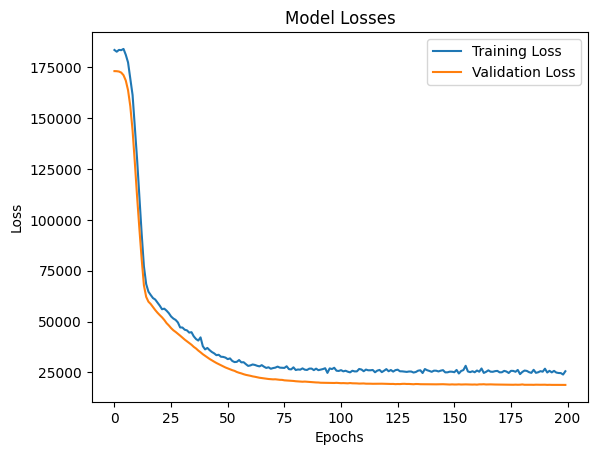

In [58]:
plt.plot(output.history['loss'], label='Training Loss')
plt.plot(output.history['val_loss'], label='Validation Loss')
plt.title('Model Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [59]:
loss = model.evaluate(x_test, y_test)
print(f"Validation Loss: {loss}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 21384.4590
Validation Loss: 21518.03515625


In [60]:
my_house = {
    'OverallQual': 10,
    'YearBuilt': 2019,
    'YearRemodAdd': 2020,
    'TotalBsmtSF': 0,
    '1stFlrSF': 100,
    'FullBath': 1,
    'GarageCars': 6,
    'GarageArea': 50,
    'GrLivArea': 9,
    'TotRmsAbvGrd': 1
}

In [61]:
my_house_detail = np.array([list(my_house.values())])
my_house_detail = scaler.transform(my_house_detail)

In [62]:
my_house_price = model.predict(my_house_detail)
print(f"Predicted House Price: {my_house_price[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted House Price: 196176.21875


In [63]:
model.save('House_Prices.h5')

In [64]:
model: Sequential = load_model('House_Prices.h5')

In [65]:
test_data = pd.read_csv('input/House_Price/test.csv')

custom_dataset = test_data[['OverallQual', 'YearBuilt',
                            'YearRemodAdd', 'TotalBsmtSF',
                               '1stFlrSF', 'FullBath',
                               'GarageCars', 'GarageArea',
                               'GrLivArea', 'TotRmsAbvGrd']]

In [66]:
custom_dataset.fillna(custom_dataset.mean(), inplace=True)

custom_dataset = scaler.transform(custom_dataset)

C:\Users\Omid\AppData\Local\Temp\ipykernel_2088\2879778597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  custom_dataset.fillna(custom_dataset.mean(), inplace=True)
c:\Users\Omid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [67]:
predictions = model.predict(custom_dataset)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [91]:
result_df = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': predictions.flatten()
})

result_df.to_csv('predictions.csv', index=False)